In [16]:
import numpy as np
import matplotlib.pyplot as plt

data = []

data.append(np.loadtxt('time-series_non_magnetic_1nm/output'))
data.append(np.loadtxt('time-series_non_magnetic_1p5_nm/output'))
data.append(np.loadtxt('non_magnetic_script/exchange1/output'))
data.append(np.loadtxt('time-series_non_magnetic_2p5_nm/output'))
data.append(np.loadtxt('time-series_non_magnetic_3p5_nm/output'))

data = np.array(data)


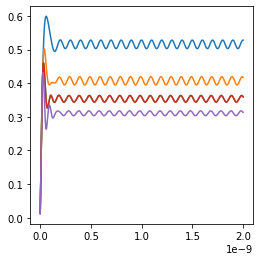

In [17]:
plt.figure(figsize = (4,4))
for i in range(5):
    plt.plot(data[0,:,0],data[i,:,1])


Text(0, 0.5, 'Psa (a.u.)')

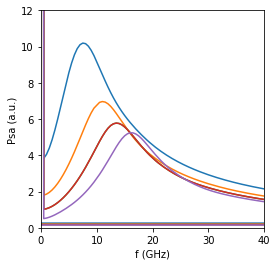

In [18]:
import scipy.fftpack

psd = []

for i in range(5):
    psd.append(np.abs(scipy.fftpack.fft(data[i,:,1])))
    
    
psd = np.array(psd)

psd2 = []

for i in range(5):
    psd2.append(np.delete((np.delete(psd[i],40)),20))
    
f_axis = scipy.fftpack.fftfreq(2000, d=2e-9/2000)
f_axis2 = np.delete(f_axis,40)
f_axis3 = np.delete(f_axis2,20)

psd2 = np.array(psd2)

plt.figure(figsize = (4,4))
for ii in range(5):
    plt.plot(f_axis3/1e9, psd2[ii,:])
    plt.xlim([0, 30])
    plt.ylim([0, 35])
    plt.xlabel('f (GHz)')
    plt.ylabel('Psa (a.u.)')
    
    



plt.xlim([0, 40])
plt.ylim([0, 12])
plt.xlabel('f (GHz)')
plt.ylabel('Psa (a.u.)')


Text(0, 0.5, 'Psa (a.u.)')

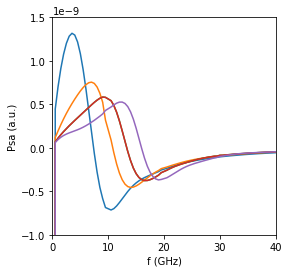

In [44]:
d_psd =[]

for i in range(5):
    d_psd.append(np.diff(psd2[i])/np.diff(f_axis3))

d_psd = np.array(d_psd)

plt.figure(figsize = (4,4))

for i in range(5):
    plt.plot(f_axis3[:500]/1e9,d_psd[i,:500])





plt.xlim([0, 40])
plt.ylim([-1e-9, 1.5e-9])
plt.xlabel('f (GHz)')
plt.ylabel('Psa (a.u.)')

In [38]:
d_psd.shape

(5, 1997)